<a href="https://colab.research.google.com/github/Madydonis/Colab/blob/main/Intro%20Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro al Feature Engineering
Mady Sarahí Donis Barrera - 1015121

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('train_1.csv')

In [7]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
def VerificaDatosFaltantes (df):
  for col in df.columns.tolist():
    print ('{} missing Values:{}'.format(col,df[col].isna().sum()),'. (',(df[col].isna().sum()/df.shape[0])*100,')')

VerificaDatosFaltantes(df)

PassengerId missing Values:0 . ( 0.0 )
HomePlanet missing Values:201 . ( 2.312205222592891 )
CryoSleep missing Values:217 . ( 2.4962613597147127 )
Cabin missing Values:199 . ( 2.289198205452663 )
Destination missing Values:182 . ( 2.093638559760727 )
Age missing Values:179 . ( 2.0591280340503855 )
VIP missing Values:203 . ( 2.3352122397331185 )
RoomService missing Values:181 . ( 2.082135051190613 )
FoodCourt missing Values:183 . ( 2.105142068330841 )
ShoppingMall missing Values:208 . ( 2.392729782583688 )
Spa missing Values:183 . ( 2.105142068330841 )
VRDeck missing Values:188 . ( 2.1626596111814105 )
Name missing Values:200 . ( 2.300701714022777 )
Transported missing Values:0 . ( 0.0 )


In [9]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
def EliminaDatosFaltantes(df,col):
  df = df[df[col].notna()]
  return df

df2 = EliminaDatosFaltantes(df,"Name")

VerificaDatosFaltantes(df2)

PassengerId missing Values:0 . ( 0.0 )
HomePlanet missing Values:194 . ( 2.2842340751206875 )
CryoSleep missing Values:207 . ( 2.4373013069586715 )
Cabin missing Values:197 . ( 2.319557282467915 )
Destination missing Values:178 . ( 2.095843635935476 )
Age missing Values:176 . ( 2.072294831037325 )
VIP missing Values:202 . ( 2.3784292947132935 )
RoomService missing Values:180 . ( 2.1193924408336278 )
FoodCourt missing Values:178 . ( 2.095843635935476 )
ShoppingMall missing Values:204 . ( 2.401978099611445 )
Spa missing Values:177 . ( 2.0840692334864004 )
VRDeck missing Values:184 . ( 2.1664900506299305 )
Name missing Values:0 . ( 0.0 )
Transported missing Values:0 . ( 0.0 )


<ipython-input-11-f86c4f63d39e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Age_Median"] = df2["Age"]
<ipython-input-11-f86c4f63d39e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Age_Mean"] = df2["Age"]
<ipython-input-11-f86c4f63d39e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

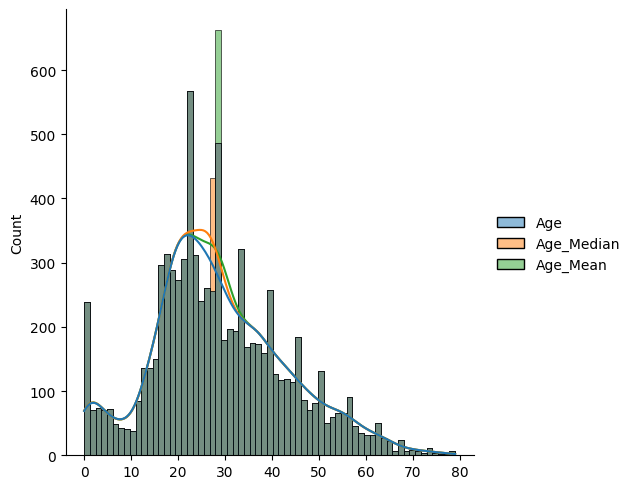

In [11]:
df2["Age_Median"] = df2["Age"]
df2["Age_Mean"] = df2["Age"]
df2["Age_Median"].fillna(df2["Age"].median(),inplace=True)
df2["Age_Mean"].fillna(df2["Age"].mean(),inplace=True)

sns.displot([df2["Age"],df2["Age_Median"],df2["Age_Mean"]],kde="True")

In [12]:
def ReemplazarDatosFaltantes(df,col,medida):
  if(medida == "median"): #Reemplazar datos con la mediana
    df[col].fillna(df[col].median(),inplace=True)
  elif(medida == "mean"): #reemplazar datos con la media
    df[col].fillna(df[col].mean(),inplace=True)
  else: #reemprazar datos con la moda
    df[col].fillna(df[col].mode(),inplace=True)
  return df

In [15]:
df2["HomePlanet"].fillna(df2["HomePlanet"].mode(),inplace=True)
df2["CryoSleep"].fillna(df2["CryoSleep"].mode(),inplace=True)
df2["Cabin"].fillna(df2["Cabin"].mode(),inplace=True)
df2["Destination"].fillna(df2["Destination"].mode(),inplace=True)
df2["RoomService"].fillna(df2["RoomService"].mode(),inplace=True)
df2["FoodCourt"].fillna(df2["FoodCourt"].mode(),inplace=True)
df2["VIP"].fillna(df2["VIP"].mode(),inplace=True)
df2["Spa"].fillna(df2["Spa"].mode(),inplace=True)
df2["VRDeck"].fillna(df2["VRDeck"].mode(),inplace=True)
df2["Age"].fillna(df2["Age"].mode(),inplace=True)
df2["ShoppingMall"].fillna(df2["ShoppingMall"].mode(),inplace=True)
df2["Transported"].fillna(df2["Transported"].mode(),inplace=True)
df2["Name"].fillna(df2["Name"].mode(),inplace=True)
df2["PassengerId"].fillna(df2["PassengerId"].mode(),inplace=True)


<ipython-input-15-e0d13ce38c90>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["HomePlanet"].fillna(df2["HomePlanet"].mode(),inplace=True)
<ipython-input-15-e0d13ce38c90>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

REEMPLAZAR DATOS

In [16]:
df2["Name"].unique()
df2["Name"].value_counts(normalize=True)

,proportion
Name,
Gollux Reedall,0.000235
Elaney Webstephrey,0.000235
Grake Porki,0.000235
Sus Coolez,0.000235
Apix Wala,0.000235
...,...
Jamela Griffy,0.000118
Hardy Griffy,0.000118
Salley Mckinn,0.000118


In [18]:
#df2.loc[df["Name"]=="Grake Porki"] #entra por medio del índice en el dataset
df2.drop("Name", axis="columns", inplace=True)
df2.drop("PassengerId", axis="columns", inplace=True)

In [19]:
df2.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.250942,0.641694,0.000118,0.694983,39.0,0.976561,0.0,0.0,0.0,0.0,0.0,False
1,0.541922,0.641694,0.000118,0.694983,24.0,0.976561,109.0,9.0,25.0,549.0,44.0,True
2,0.250942,0.641694,0.000235,0.694983,58.0,0.023439,43.0,3576.0,0.0,6715.0,49.0,False
3,0.250942,0.641694,0.000235,0.694983,33.0,0.976561,0.0,1283.0,371.0,3329.0,193.0,False
4,0.541922,0.641694,0.000118,0.694983,16.0,0.976561,303.0,70.0,151.0,565.0,2.0,True


In [21]:
df2.Transported = df2.Transported.replace({True:1,False:0})

<ipython-input-21-51878062a7f7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.Transported = df2.Transported.replace({True:1,False:0})


<Axes: >

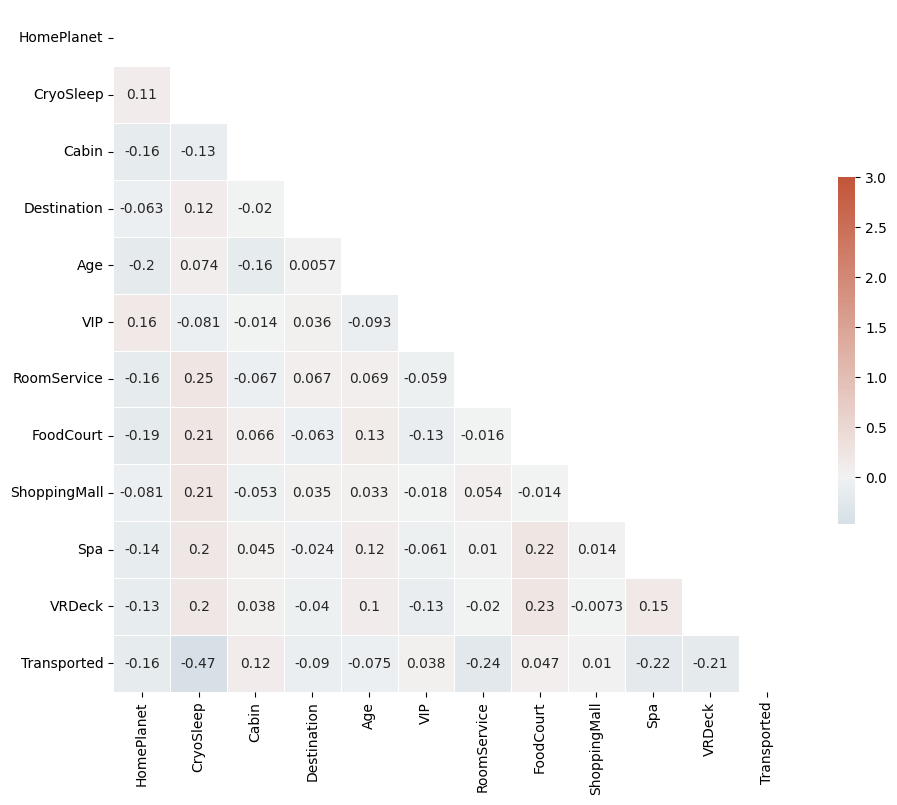

In [24]:
#Ejecutar correlaciones
#Esta comparando cada una de las variables una contra la otra, diciendo que correlacion existe entre pares
#No importa tener correlacion negativa, lo importa es que sea fuerte (mas cercano a -1 o +1 mejor)
corr = df2.corr(method="pearson")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9)) #recibe en una función los valores de retorno
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":0.5},annot=True)

In [26]:
def CuantificaOutliers(dataset):
  for col in dataset.columns:
    q1,q3 = np.percentile(dataset[col],[25,75])
    iqr = q3-q1
    #VALORES EXTREMOS
    lower_bound = q1 - (1.5*iqr) #limite inferior
    upper_bound = q3 + (1.5*iqr) #limite superior
    #valores anomalos, que superan el rango de mis límites
    outlier = dataset[(dataset[col]<lower_bound) | (dataset[col]>upper_bound)]
    print(col,". Registros:", outlier.shape[0],". Porc:",
          outlier.shape[0]/dataset.shape[0]*100)

CuantificaOutliers(df2)


HomePlanet . Registros: 0 . Porc: 0.0
CryoSleep . Registros: 0 . Porc: 0.0
Cabin . Registros: 0 . Porc: 0.0
Destination . Registros: 0 . Porc: 0.0
Age . Registros: 0 . Porc: 0.0
VIP . Registros: 0 . Porc: 0.0
RoomService . Registros: 0 . Porc: 0.0
FoodCourt . Registros: 0 . Porc: 0.0
ShoppingMall . Registros: 0 . Porc: 0.0
Spa . Registros: 0 . Porc: 0.0
VRDeck . Registros: 0 . Porc: 0.0
Transported . Registros: 0 . Porc: 0.0


In [14]:
def FrequencyEnconding (dataset,col):
  freq = dataset[col].value_counts(normalize=True)
  dataset[col]=dataset[col].map(freq)
  return dataset

df2 = df
df2 = FrequencyEnconding(df2,"HomePlanet")
df2 = FrequencyEnconding(df2,"CryoSleep")
df2 = FrequencyEnconding(df2,"Cabin")
df2 = FrequencyEnconding(df2,"Destination")
df2 = FrequencyEnconding(df2,"VIP")